   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 9.91M/9.91M [00:00<00:00, 50.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.08MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.26MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Loss: 0.18470934609910333
Epoch 2/5, Loss: 0.04983386969025523
Epoch 3/5, Loss: 0.03376781632567742
Epoch 4/5, Loss: 0.02585815387806033
Epoch 5/5, Loss: 0.02023176694053227
Model Accuracy on MNIST: 99.10%
模型已保存


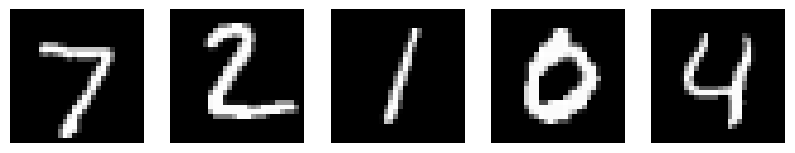

✅ CNN 訓練完成，準備進行對抗攻擊實驗。


In [ ]:
# === Step 1: 安裝必要的庫 ===
!pip install torch torchvision matplotlib numpy tqdm

# === Step 2: 導入相關函式庫 ===
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# === Step 3: 設置設備（如果有 GPU 則使用 GPU） ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Step 4: 下載並加載 MNIST 數據集 ===
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# === Step 5: 定義 CNN 模型 ===
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# === Step 6: 創建模型並移動到 GPU（如果可用） ===
model = CNN().to(device)

# === Step 7: 設置損失函數和優化器 ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Step 8: 訓練 CNN 模型 ===
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader)}")

# === Step 9: 測試模型準確率 ===
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Model Accuracy on MNIST: {100 * correct / total:.2f}%")

# === Step 10: 保存模型 ===
torch.save(model.state_dict(), "mnist_cnn.pth")
print("模型已保存")

# === Step 11: 顯示一些測試圖片 ===
dataiter = iter(testloader)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image = np.squeeze(images[i].numpy())
    axes[i].imshow(image, cmap="gray")
    axes[i].axis("off")
plt.show()

print("✅ CNN 訓練完成，準備進行對抗攻擊實驗。")

🖥 Using device: cpu
✅ Test dataset total size: 10000
✅ 已成功載入訓練好的模型！

==== 開始測試 FGSM 攻擊 ====
🔹 Epsilon = 0
🔹 目標樣本數 = 1000

🔸 [Batch 0] 原始預測: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
🔸 [Batch 0] 真實標籤: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
🔹 Perturbation Min: -0.00011415270273573697, Max: 9.606138337403536e-05
🔸 [Batch 0] 對抗樣本預測: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
✅ [Batch 0] 正確數量（本批）: 10, 批次總數: 10
🔹 之前累積正確數: 0, 之前累積總數: 0
🔹 更新後累積正確數: 10, 更新後累積總數: 10



<ipython-input-62-10f782dd6b2f>:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_cnn.pth", map_location=device))


串流輸出內容已截斷至最後 5000 行。
🔹 Perturbation Min: -0.014626985415816307, Max: 0.01723545789718628
🔸 [Batch 49] 對抗樣本預測: [0, 5, 2, 3, 7, 0, 9, 4, 0, 6]
✅ [Batch 49] 正確數量（本批）: 9, 批次總數: 10
🔹 之前累積正確數: 464, 之前累積總數: 490
🔹 更新後累積正確數: 473, 更新後累積總數: 500


🔸 [Batch 50] 原始預測: [3, 9, 5, 2, 1, 3, 1, 3, 6, 5]
🔸 [Batch 50] 真實標籤: [3, 9, 5, 2, 1, 3, 1, 3, 6, 5]
🔹 Perturbation Min: -0.0012638994958251715, Max: 0.0007193953497335315
🔸 [Batch 50] 對抗樣本預測: [3, 9, 5, 2, 1, 3, 1, 3, 6, 5]
✅ [Batch 50] 正確數量（本批）: 10, 批次總數: 10
🔹 之前累積正確數: 473, 之前累積總數: 500
🔹 更新後累積正確數: 483, 更新後累積總數: 510


🔸 [Batch 51] 原始預測: [7, 4, 2, 2, 6, 3, 2, 6, 5, 4]
🔸 [Batch 51] 真實標籤: [7, 4, 2, 2, 6, 3, 2, 6, 5, 4]
🔹 Perturbation Min: -0.00024133645638357848, Max: 0.00038974540075287223
🔸 [Batch 51] 對抗樣本預測: [7, 4, 2, 2, 6, 3, 2, 6, 5, 4]
✅ [Batch 51] 正確數量（本批）: 10, 批次總數: 10
🔹 之前累積正確數: 483, 之前累積總數: 510
🔹 更新後累積正確數: 493, 更新後累積總數: 520


🔸 [Batch 52] 原始預測: [8, 9, 7, 1, 3, 0, 3, 8, 3, 1]
🔸 [Batch 52] 真實標籤: [8, 9, 7, 1, 3, 0, 3, 8, 3, 1]
🔹 Perturbation Min: -0.0

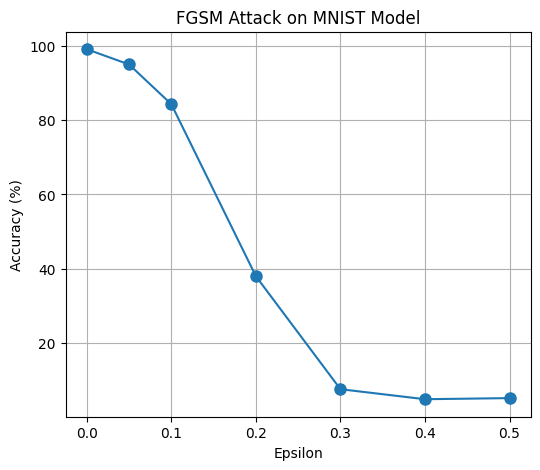

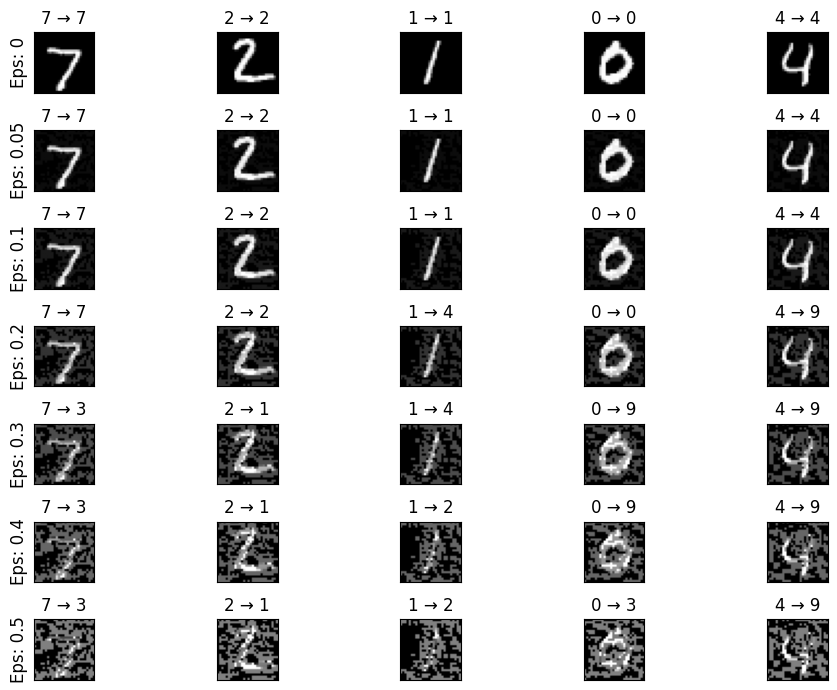

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# === Step 1: 設置設備（GPU 或 CPU） ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🖥 Using device: {device}")

# === Step 2: 下載並加載 MNIST 測試數據集 ===
transform = transforms.Compose([transforms.ToTensor()])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)  # 每批 10 張

print(f"✅ Test dataset total size: {len(testset)}")

# === Step 3: 定義 CNN 模型 ===
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# === Step 4: 載入模型 ===
model = CNN().to(device)
model.load_state_dict(torch.load("mnist_cnn.pth", map_location=device))
model.eval()
print("✅ 已成功載入訓練好的模型！")


# === Step 5: 定義 FGSM 攻擊函數 ===
def fgsm_attack(image, epsilon, data_grad):
    if data_grad is None:
        print(f"⚠️ Warning: Gradient is None for epsilon {epsilon}")
        return image

    perturbed_image = image + epsilon * data_grad.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)

    return perturbed_image

# === Step 6: 測試 FGSM 攻擊（ 10000 張圖片） ===
def test_fgsm_attack(model, test_loader, epsilon, num_samples=10000):
    model.eval()
    correct = 0
    total = 0

    print("\n==== 開始測試 FGSM 攻擊 ====")
    print(f"🔹 Epsilon = {epsilon}")
    print(f"🔹 目標樣本數 = {num_samples}")

    for batch_idx, (data, target) in enumerate(test_loader):
        if total >= num_samples:
            break

        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        # Step 1: **正常預測**
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        # **Debug: Print 初始預測**
        print(f"\n🔸 [Batch {batch_idx}] 原始預測: {init_pred.view(-1).tolist()}")
        print(f"🔸 [Batch {batch_idx}] 真實標籤: {target.view(-1).tolist()}")

        # Step 2: **計算損失**
        loss = F.cross_entropy(output, target)
        model.zero_grad()
        loss.backward()

        # Step 3: **取得數據梯度，生成對抗樣本**
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # **Debug: Perturbation Min/Max**
        print(f"🔹 Perturbation Min: {data_grad.min().item()}, Max: {data_grad.max().item()}")

        # Step 4: **測試模型對對抗樣本的預測**
        output = model(perturbed_data)
        final_pred = output.max(1, keepdim=True)[1]

        # **Debug: Print 對抗樣本預測**
        print(f"🔸 [Batch {batch_idx}] 對抗樣本預測: {final_pred.view(-1).tolist()}")

        # **修正 batch_total，確保不超過 100**
        batch_total = min(num_samples - total, data.size(0))

        # **修正 batch_correct，確保逐個檢查相等數量**
        batch_correct = sum(1 for i in range(batch_total) if final_pred[i].item() == target[i].item())
        print(f"✅ [Batch {batch_idx}] 正確數量（本批）: {batch_correct}, 批次總數: {batch_total}")
        print(f"🔹 之前累積正確數: {correct}, 之前累積總數: {total}")

        correct += batch_correct
        total += batch_total

        print(f"🔹 更新後累積正確數: {correct}, 更新後累積總數: {total}\n")

    # **確保 `correct` 不會超過 `total`**
    if correct > total:
        print(f"⚠️ **錯誤！正確數量超過總數**: correct={correct}, total={total}")
        correct = total  # 直接修正

    # 計算最終準確率
    final_acc = (correct / total) * 100 if total > 0 else 0
    print(f"\n✅ 測試完成！")
    print(f"✅ Epsilon: {epsilon}, 測試樣本總數: {total}, 總正確數: {correct}")
    print(f"✅ **最終準確率: {final_acc:.2f}%**")

    return final_acc

# === 執行測試（測試 10000 張圖片） ===
# test_fgsm_attack(model, testloader, epsilon=0.3, num_samples=10000)

# === 測試不同 Epsilon 值 ===
epsilons = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []  # 存放準確率

for eps in epsilons:
    acc = test_fgsm_attack(model, testloader, epsilon=eps, num_samples=1000)  # 測試 10000 張圖片
    accuracies.append(acc)

# === 繪製準確率下降曲線 ===
plt.figure(figsize=(6,5))
plt.plot(epsilons, accuracies, 'o-', markersize=8)
plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title("FGSM Attack on MNIST Model")
plt.grid(True)
plt.show()



# === Step 10: 可視化對抗樣本（不同 Epsilon 值） ===
epsilons = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
examples = []

for eps in epsilons:
    for data, target in testloader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        # **Step 1: 正常预测**
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        # **Step 2: 计算损失**
        loss = F.cross_entropy(output, target)
        model.zero_grad()
        loss.backward()

        # **Step 3: 生成对抗样本**
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, eps, data_grad)

        # **Step 4: 测试对抗样本的预测**
        output = model(perturbed_data)
        final_pred = output.max(1, keepdim=True)[1]

        # **Step 5: 选择对抗样本**
        adv_examples = []
        for i in range(len(target)):
            if len(adv_examples) >= 5:
                break
            adv_examples.append((
                data[i].detach().cpu().numpy(),
                perturbed_data[i].detach().cpu().numpy(),
                target[i].item(),
                final_pred[i].item()
            ))  # 🚀 无论预测对错，都存储 5 个样本

        examples.append(adv_examples)
        break  # 只需要一个 batch

# === Step 11: 繪製對抗樣本 ===
plt.figure(figsize=(10, 7))
for i in range(len(epsilons)):
    for j in range(5):  # 每個 epsilon 值顯示 5 張圖片
        plt.subplot(len(epsilons), 5, i * 5 + j + 1)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel(f"Eps: {epsilons[i]}", fontsize=12)
        if j < len(examples[i]):  # 確保不超出索引範圍
            orig, adv, orig_label, adv_label = examples[i][j]
            plt.title(f"{orig_label} → {adv_label}")  # 顯示 原始標籤 → 攻擊後的標籤
            plt.imshow(adv.squeeze(), cmap="gray")  # 畫出對抗樣本
plt.tight_layout()
plt.show()